In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
file_path = './ML/player_attribute.csv'  # Replace with your file path
player_data = pd.read_csv(file_path)



# Feature Selection
**Pick the numerical columns relevant for clustering, excluding IDs and non-player-specific information.**

In [38]:
# Exclude IDs and irrelevant columns
excluded_columns = ['player_api_id', 'id', 'player_fifa_api_id', 'season','role']
numerical_columns = player_data.select_dtypes(include=['float64', 'int64']).columns
selected_columns = [col for col in numerical_columns if col not in excluded_columns]

# Select these columns for further processing
selected_data = player_data[selected_columns]


**Fill missing values with column means**

In [39]:

cleaned_data = selected_data.fillna(selected_data.mean())


# Normalize the Data

**Normalize the numerical features to ensure all features contribute equally to clustering.**

In [50]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(cleaned_data)

normalized_data


array([[-0.54279394, -0.66038158, -0.63912512, ..., -0.48119839,
        -0.46523436,  0.22608502],
       [-0.54279394, -0.66038158, -0.63912512, ..., -0.48119839,
        -0.46523436,  0.22608502],
       [-1.20211589, -1.38847028, -0.63912512, ..., -0.48119839,
        -0.46523436, -0.54586657],
       ...,
       [ 0.77584997,  0.65017809,  0.83563681, ...,  0.40036088,
         0.36276953, -0.59849963],
       [ 0.90771436,  0.79579583,  0.83563681, ...,  0.40036088,
         0.36276953, -0.58095528],
       [ 1.17144314,  0.79579583,  0.83563681, ..., -0.55466167,
         0.01776791, -0.30901779]], shape=(283299, 36))

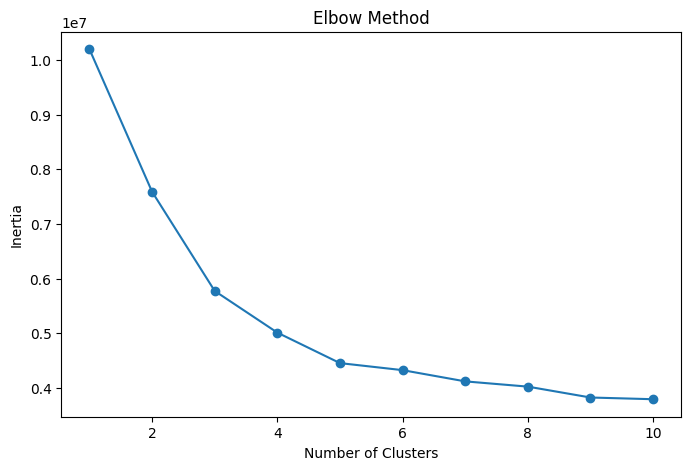

In [41]:
# Calculate inertia for different cluster numbers
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


# fit k-means

In [42]:
optimal_k = 4  # Replace with the chosen value from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add the cluster labels to the original dataset
player_data['cluster'] = clusters


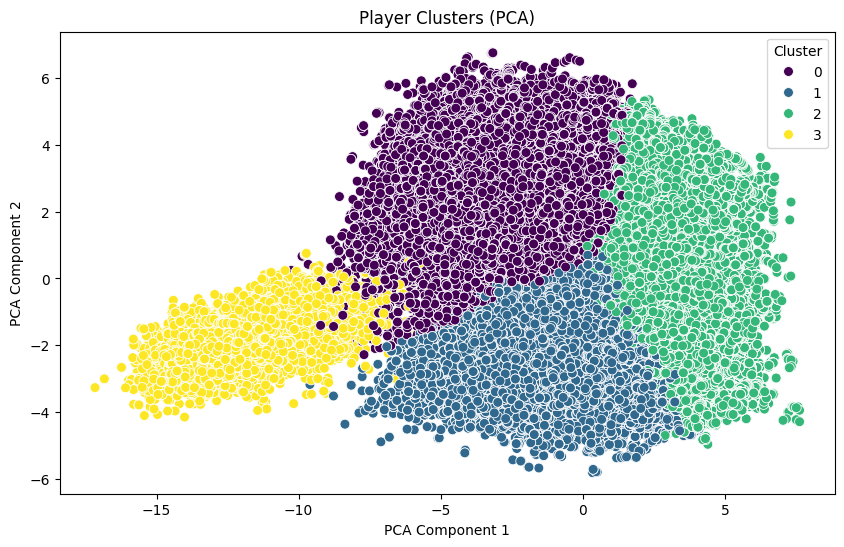

In [43]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=player_data['cluster'], palette='viridis', s=50)
plt.title('Player Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


# Add Cluster Labels to the Dataset

In [44]:
player_data['cluster'] = clusters  # Add cluster labels to the dataset



In [45]:
player_data[player_data['cluster'] == 0]

,player_api_id,player_name,id,player_fifa_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season,role,performance_score,cluster
0,505942,Aaron Appindangoye,1,218353,2016-02-18,67.0,71.0,right,medium,medium,...,69.0,6.0,11.0,10.0,8.0,8.0,2016,Defender,47.275,0
1,505942,Aaron Appindangoye,2,218353,2015-11-19,67.0,71.0,right,medium,medium,...,69.0,6.0,11.0,10.0,8.0,8.0,2015,Defender,47.275,0
2,505942,Aaron Appindangoye,3,218353,2015-09-21,62.0,66.0,right,medium,medium,...,69.0,6.0,11.0,10.0,8.0,8.0,2015,Defender,42.875,0
3,505942,Aaron Appindangoye,4,218353,2015-03-20,61.0,65.0,right,medium,medium,...,66.0,5.0,10.0,9.0,7.0,7.0,2015,Defender,41.725,0
4,505942,Aaron Appindangoye,5,218353,2007-02-22,61.0,65.0,right,medium,medium,...,66.0,5.0,10.0,9.0,7.0,7.0,2007,Defender,41.725,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283264,35506,Zurab Khizanishvili,183964,47058,2009-08-30,70.0,78.0,right,NaN,_0,...,65.0,14.0,25.0,51.0,25.0,25.0,2009,Defender,49.225,0
283265,35506,Zurab Khizanishvili,183965,47058,2009-02-22,70.0,78.0,right,NaN,_0,...,65.0,14.0,25.0,51.0,25.0,25.0,2009,Defender,49.225,0
283266,35506,Zurab Khizanishvili,183966,47058,2008-08-30,72.0,78.0,right,NaN,_0,...,65.0,14.0,25.0,51.0,25.0,25.0,2008,Defender,50.775,0
283267,35506,Zurab Khizanishvili,183967,47058,2007-08-30,75.0,78.0,right,NaN,_0,...,65.0,14.0,25.0,51.0,25.0,25.0,2007,Defender,51.975,0


In [48]:
# Filter numeric columns only


numeric_columns = player_data.select_dtypes(include=[np.number]).columns
numeric_data = player_data[numeric_columns]

# Add the cluster column back


numeric_data['cluster'] = player_data['cluster']

# Group by cluster and calculate the mean


cluster_profiles = numeric_data.groupby('cluster').mean()

# Display the cluster profiles
print("Cluster Profiles (Average Numeric Attribute Values):")
cluster_profiles


Cluster Profiles (Average Numeric Attribute Values):


C:\Users\Youcode\AppData\Local\Temp\ipykernel_25920\2882789174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['cluster'] = player_data['cluster']


,player_api_id,id,player_fifa_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season,performance_score
cluster,,,,,,,,,,,,,,,,,,,,,
0,135708.709474,91682.306353,165564.717297,67.175384,71.965748,52.374106,36.835620,63.916394,62.082649,38.744164,...,65.900335,68.764659,66.870874,9.801730,11.535603,16.817957,11.643815,11.606512,2012.448105,46.918999
1,151274.716824,91988.200312,172815.817051,67.347251,73.112492,58.047372,63.963687,56.910395,63.727284,60.708525,...,29.167009,32.661395,30.245514,9.726263,11.711109,16.210454,11.550164,11.465519,2012.420415,40.350433
2,77512.715674,90900.975311,146201.633259,77.335837,80.440516,72.485653,65.798108,64.253582,77.263971,67.462348,...,51.251373,57.417369,54.653463,9.823521,11.590933,19.254550,11.525206,11.530396,2012.798776,49.437558
3,100413.016217,94539.443937,148967.494705,68.278594,72.624040,18.806195,18.197644,19.224715,28.014628,17.295330,...,18.478025,19.029057,17.979459,69.904752,66.432949,64.314138,67.261252,71.472862,2012.145486,47.980548


C:\Users\Youcode\AppData\Local\Temp\ipykernel_25920\3596792979.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_profiles_reset, x='cluster', y=attribute, palette='viridis')
C:\Users\Youcode\AppData\Local\Temp\ipykernel_25920\3596792979.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_profiles_reset, x='cluster', y=attribute, palette='viridis')
C:\Users\Youcode\AppData\Local\Temp\ipykernel_25920\3596792979.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_profiles_reset, x='cluster', y=attribu

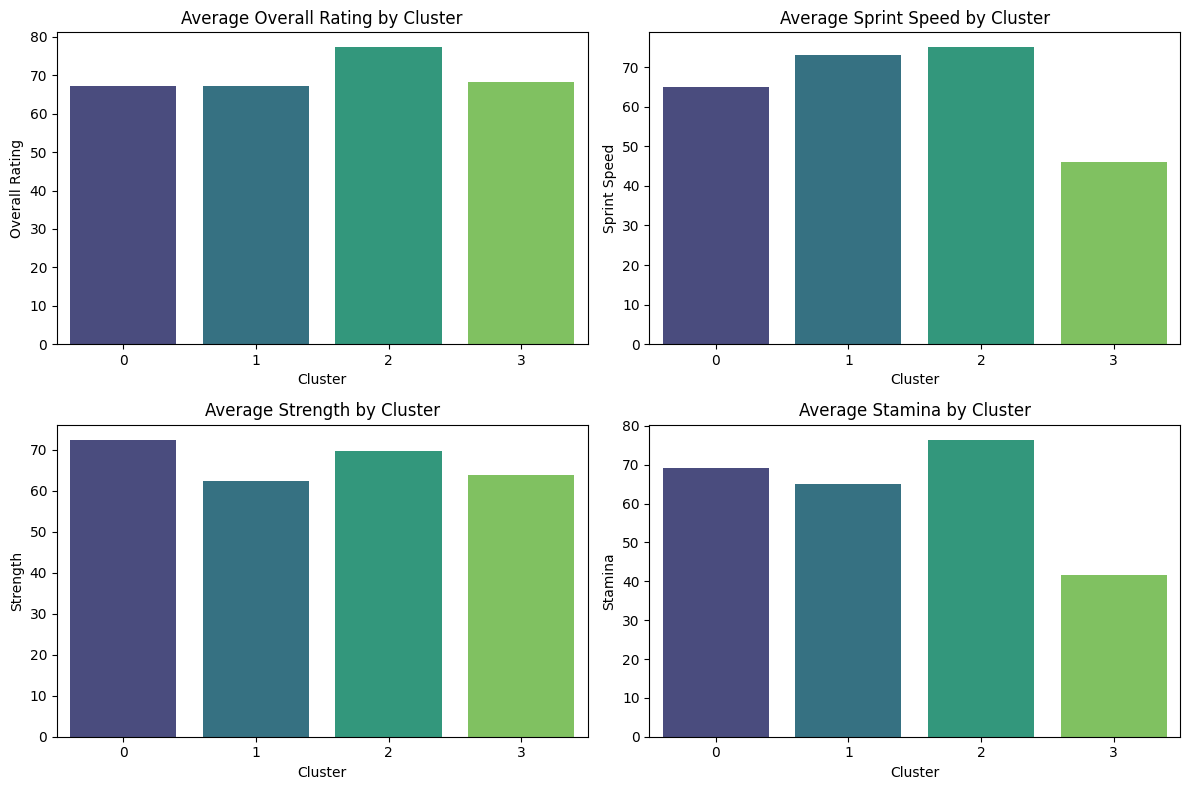

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index for easier plotting
cluster_profiles_reset = cluster_profiles.reset_index()

# Set a list of attributes you want to compare
attributes = ['overall_rating', 'sprint_speed', 'strength', 'stamina']

# Plot each attribute
plt.figure(figsize=(12, 8))
for i, attribute in enumerate(attributes):
    plt.subplot(2, 2, i + 1)  # Create a grid of 2x2 subplots
    sns.barplot(data=cluster_profiles_reset, x='cluster', y=attribute, palette='viridis')
    plt.title(f'Average {attribute.replace("_", " ").title()} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(attribute.replace("_", " ").title())

plt.tight_layout()
plt.show()


# TEAMS  CLUSTRING

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

def cluster_teams(matches_file, attributes_file, n_clusters=3):
    """
    Effectue un clustering des équipes basé sur leurs attributs et leurs performances en buts à domicile.

    Paramètres :
        matches_file (str) : Chemin vers le fichier CSV des matchs.
        attributes_file (str) : Chemin vers le fichier CSV des attributs des équipes.
        n_clusters (int) : Nombre de clusters à former (par défaut : 3).
    """
    # Charger les fichiers CSV
    try:
        matches_data = pd.read_csv(matches_file)
        attributes_data = pd.read_csv(attributes_file)
    except Exception as e:
        print(f"Erreur lors du chargement des fichiers : {e}")
        return

    # Vérifier les colonnes nécessaires dans les deux datasets
    required_matches_columns = ['HomeTeam_long_name', 'home_team_goal']
    required_attributes_columns = ['team_long_name', 'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing']

    if not all(col in matches_data.columns for col in required_matches_columns):
        print(f"Le fichier des matchs doit contenir les colonnes suivantes : {required_matches_columns}")
        return

    if not all(col in attributes_data.columns for col in required_attributes_columns):
        print(f"Le fichier des attributs doit contenir les colonnes suivantes : {required_attributes_columns}")
        return

    # Calculer le total des buts à domicile par équipe
    home_goals = matches_data.groupby('HomeTeam_long_name')['home_team_goal'].sum().reset_index()
    home_goals.rename(columns={'HomeTeam_long_name': 'team_long_name', 'home_team_goal': 'total_home_goals'}, inplace=True)

    # Fusionner les données de buts avec les attributs des équipes
    merged_data = pd.merge(home_goals, attributes_data, on='team_long_name', how='inner')

    # Sélectionner les colonnes pertinentes pour le clustering
    clustering_features = ['total_home_goals', 'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing']
    data_for_clustering = merged_data[clustering_features].dropna()

    # Normaliser les données
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data_for_clustering)

    # Appliquer K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    merged_data['cluster'] = kmeans.fit_predict(normalized_data)

    # Visualisation des clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=merged_data['total_home_goals'],
        y=merged_data['buildUpPlayPassing'],
        hue=merged_data['cluster'],
        palette='viridis',
        s=100
    )
    plt.title('Clustering des équipes basé sur leurs attributs et performances', fontsize=14)
    plt.xlabel('Total des buts à domicile', fontsize=12)
    plt.ylabel('Build Up Play Passing', fontsize=12)
    plt.legend(title='Cluster', fontsize=10)
    plt.grid(alpha=0.4)
    plt.show()

    # Afficher les équipes par cluster
    for cluster in range(n_clusters):
        print(f"\nÉquipes dans le cluster {cluster}:")
        print(merged_data[merged_data['cluster'] == cluster]['team_long_name'].values)

# Exemple d'utilisation
matches_file = './mathes_groupped_by_season.csv'
attributes_file = './table_team_attribute.csv'
cluster_teams(matches_file, attributes_file, n_clusters=3)


Le fichier des attributs doit contenir les colonnes suivantes : ['team_long_name', 'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing']
